<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
DATS 6202 Group 1 Project
</font>
</center>
</p>

<p>
<center>
<font size="4">
Convolutional Neural Networks - ResNet50 Pretrain and Learning rate schedule with a gradient descent optimizer (92.9% Accuracy)
</font>
</center>
</p>
    

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
by Adel Hassen, Lydia Teinfalt, Pedro Vasquez-Perez
</font>
</center>
</p>
</b>

<p>
<center>
<font size="3">
Last Updated: 12/03/2021
</font>
</center>
</p>
</b>

# Overview

- This notebook DATS 6202 Group Project for Fall 2021 semester. 
- Group 1 members are: Adel Hassen, Lydia Teinfalt, Pedro Vasquez-Perez
- Here we will work on Kaggle Intel Image Classification Dataset [Natural Scenes Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_train).
- The goal of this project is to classify approximately  25,000 images of size 150x150 distributed under 6 categories: 
  - {'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

# Brief Description

# Introduction: 

### What are we Working With? 
  
We have chosen a data set from the following kaggle page: [Intel Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_train), that consists of about 14,044 images in the training set, and 3000 images in the test set. These images range from six different kinds of natural scenes from around the world.  
  
- These scenes mainly consist of buildings, glaciers, forests, mountains, streets, and sea.  
- Additionally, all images are of 150x150 dimensions.  
  
We wish to classify these images with the best accuracy we can obtain, and we will be mainly focusing on the use of convolutional neural networks (CNNs).  
     
### What is a Convolutional Neural Network?  
  
Convolutional Neural Networks, or CNN for short, are a class of deep neural network, that can be used for visual perception, voice recognition, and natural language processing, among other things. In this project, we will be focusing on the visual imagery part of them. 
CNNs are based on biological processes and the visual cortex, but we as humans can use our eyes to identify objects since we are born. This is not the case for computers, as they see numbers in the place of images. This is where CNNs come in, giving the computer a "human" eye, that allows them to process images in order to help in the process of image classification.  

### Why do we elect Convolutional Neural Networks?  
- The images from our chosen data set consists mostly of 150x150 pixel images, which if we run them through an FNN model, these would have an excessively large amount of parameters therefore it would be too computationally expensive to use FNN, hence why we will look at this problem with the use of CNN.

# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/Final_Project/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/Final_Project/Utilities_Deep/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/Final_Project/Utilities_Deep


## Loading the data

Group1 Final project dataset from Kaggle: Intel Classification Dataset [Natural Scenes Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_train)   
  
There are a few ways that we can obtain the data for this problem. The easiest way would be to download the data directly from the [Intel Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_train) file directories, but this might be a bit more time consuming.  
Therefore, the below lines of code are used in order to directly download the data from the kaggle page. In the process, making reproducibility much easier for somebody that would want to try it out without having to exit the page and manually download/search for the required data sets.  
  
#### **NOTE:** Make sure to have the kaggle.json file included in the repository of the project. 

### Creating the directory for the data

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/data/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Final_Project/

/content/drive/My Drive/Colab Notebooks/Final_Project


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/Final_Project


In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/kaggle.json

chmod: cannot access '/root/kaggle.json': No such file or directory


In [ ]:
!ls ~/.kaggle

kaggle.json


In [ ]:
%cd data

/content/drive/My Drive/Colab Notebooks/Final_Project/data


In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


Bypass downloading data again by reponding "N" to the prompt.

In [ ]:
!unzip intel-image-classification.zip -d intel

Archive:  intel-image-classification.zip
replace intel/seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
%ls

intel/  intel-image-classification.zip


## Getting the name of the target

In [ ]:
# Get the target
target = 'label'

In [ ]:
# Set the data directory
data_dir = directory + '/intel/seg_train/seg_train/'

#Cleaning up bad data

### Manually Removing Bad Training Data
  
By doing a cursory review of images in the training data, we manually created a list of bad images for each class in the initial training dataset and created a function called `clean_bad_data` to remove the bad data as part of data preprocessing.  
   
Let's consider an example, in the `glacier` class, several images were found that did not relate to glaciers at all. Some images were of people, animals, or other types of landscape, like forests or deserts.  
Therefore, several images were eliminated from these repositories in order to try to keep each directory as true to its class as possible, and in doing so try and improve on the prediction accuracies for the final models.   

In [ ]:
# Clean up bad data - Only need to run one time
import IPython.display as display
from PIL import Image

# Function that accepts two the directory name and the list of bad file names
def clean_bad_data(directory, bad_list):
  num_files = os.listdir(directory)
  # Print the total number of files before deleting
  print("Number of files before delete =",len(num_files))

  # for each item in the list run the following
  for images in bad_list:
    image_filename = directory + str(images)+".jpg"

    #check of the file exists
    if os.path.exists(image_filename):
      # print the image 
      print(image_filename)
      display.display(Image.open(image_filename))
      # remove the bad file from the directory
      os.remove(image_filename)
    else:
      print("The file does not exist:" + image_filename)
  num_after_files = os.listdir(directory)
  print("Number of files after delete =",len(num_after_files))
  




In [ ]:
glacier_bad_list = [893, 2559, 3512, 3808, 4385, 4467, 4476, 5078, 5237, 5240, 5268, 5217, 5237, 5240, 6283, 6734, 7127, 7831, 8225, 8419, 8987, 9091, 9201, 9406, 9985, 10353, 10505, 
                    10467, 10935, 10970, 11070, 11537, 11821, 12083, 12624, 12845, 13417, 13644, 14851, 14860, 15267, 15039, 15290, 15468, 16334, 16416, 16467, 17168, 17312, 17682,
                    17841, 17926, 18044, 18162, 18709, 18736, 19441, 19622, 19667, 19900, 19975, 19988, 20007, 20028]

#clean glacier data
clean_bad_data(data_dir + "glacier/", glacier_bad_list)

Number of files before delete = 2342
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/glacier/893.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/glacier/2559.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/glacier/3512.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/glacier/3808.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/glacier/4385.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/glacier/4467.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/glacier/4476.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Proje


### Not Reclassifying Images
The `glacier` class had the highest number of bad data with 62 images that are not glaciers. Some of the images could have been moved to a different class such as mountain, sea or building but we simply removed the bad data from the training data before modeling.

In [ ]:
#clean up forest data
forest_bad_list = [5610]
clean_bad_data(data_dir + "forest/", forest_bad_list)


Number of files before delete = 2270
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/forest/5610.jpg
Number of files after delete = 2270


In [ ]:
#clean up mountain data
mountain_bad_list = [17496]
clean_bad_data(data_dir + "mountain/", mountain_bad_list)

Number of files before delete = 2511
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/mountain/17496.jpg
Number of files after delete = 2511


In [ ]:
#clean up sea data
sea_bad_list = [1635, 1490, 1791, 2358, 2489, 4410, 4651, 5149, 5231, 5129,5407, 5669, 6597, 9313, 10955, 11183, 11211, 11412, 11526, 12048, 13858, 13893, 15122, 15124, 16206, 16581, 18302, 18689]
clean_bad_data(data_dir + "sea/", sea_bad_list)

Number of files before delete = 2246
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/sea/1635.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/sea/1490.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/sea/1791.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/sea/2358.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/sea/2489.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/sea/4410.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/seg_train/sea/4651.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/Final_Project//data/intel/seg_train/se

### Removing  Black and White Images

The `clean_bad_data` function removed a total of 28 images that we deemed to not be suitable for the `sea` class. Some of the images were of the sea but in black and white so the data was removed instead of being converted to color images. 

## Getting the training, validation and test data
  
Different to the usual pipeline, this time we will be using the `tf.keras.utils.image_dataset_from_directory` function to help separate our respective train set into the training and validation data.  
  
Keep in mind, the split for our training and validation data sets will be 80% and 20% respectively.  

### Training Data

In [ ]:
imgHeight = 227
imgWidth = 227
batchSize = 32

#Training Data Set:
data_dir = directory + '/intel/seg_train/seg_train/'
alex_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    label_mode = 'int',
    #class_names = ['0', '1', '2', '3', '4', '5'],
    color_mode = 'rgb', 
    #color_mode = 'grayscale',
    batch_size = batchSize,
    image_size = (imgHeight, imgWidth),
    seed = random_seed,
    validation_split = 0.2,
    subset = "training"
)

Found 13942 files belonging to 6 classes.
Using 11154 files for training.


### Validation Data

In [ ]:
#Validation Data Set:
alex_val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    label_mode = 'int',
    #class_names = ['0', '1', '2', '3', '4', '5'],
    color_mode = 'rgb', 
    #color_mode = 'grayscale',
    batch_size = batchSize,
    image_size = (imgHeight, imgWidth),
    seed = random_seed,
    validation_split = 0.2,
    subset = "validation"
)


Found 13942 files belonging to 6 classes.
Using 2788 files for validation.


### Test Data

In [ ]:
#Test Data Set:
data_test_dir = directory + '/intel/seg_test/seg_test/'
alex_test = tf.keras.preprocessing.image_dataset_from_directory(
    data_test_dir,
    labels = 'inferred',
    label_mode = 'int',
    #class_names = ['0', '1', '2', '3', '4', '5'],
    color_mode = 'rgb', 
    #color_mode = 'grayscale',
    batch_size = batchSize,
    image_size = (imgHeight, imgWidth),
    seed = random_seed
)

Found 3000 files belonging to 6 classes.


From the above splits, we can observe that out of our 13942 items from the original train set:  
- 11154 of these images belong to a training set (80%).  
- 2788 of these belong to the validation set (20%).  
  
Additionally, our test set consists of 3000 files.  
  
We can also observe that all three sets consist of 6 classes, now we wish to verify which are these classes, and that all three of our data sets have the same classes. Therefore, we will conduct verification that the class names match for each set in the following section.   

##Verify Training and Test Class Names Match

In [ ]:
#As part of data preprocessing, ensuring that the class names match between training and test data. They are the same.
equivalence_check = alex_train.class_names == alex_val.class_names == alex_test.class_names
assert_fail_message = "Training, Validation, and Test classes should match"
assert(equivalence_check), assert_fail_message

# Get the class names
class_names = alex_train.class_names

# Print class names
print(class_names)

# Get the number of classes
n_classes = len(class_names)

# Print number of classes
print(n_classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6


Above, the `assert` function is used in order to confirm that all three data sets do share the same 6 classes, where if this were not true, we would have obtained the "Training, Validation, and Test classes should match" message.  
Additionally, we can confirm that our six classes are the following:  
1. buildings
2. forest
3. glacier
4. mountain
5. sea
6. street

## Compare Number of Training versus Test Data

In [ ]:
# Display number of images for each class in training
train_count = []
for names in class_names:
  count1 =len(alex_train.list_files(data_dir + "/" + str(names) + "/*.jpg"))
  train_count.append(count1)


# Display number of images for each class in test 
test_count = []
for names in class_names:
  count3 =len(alex_test.list_files(data_test_dir + "/" + str(names) + "/*.jpg"))
  test_count.append(count3)

print(test_count)


[437, 474, 553, 525, 510, 501]


The previous lines of code, show us how many images of each category are found in the original training and test sets. It can be seen that there is a good balance in the way the classes are split for both of these sets.  
  
This can be visualized much better in the following plot, where the `blue` bars show us the amount of data each category has in the training set, while the `orange` bars show us the amount of data each category has in the test set.  
Through this bar plot we can observe the test set has a much more even balance in the amount of images each class has. Regardless, the training set has a good balance, where the category with the least amount of images is `buildings` with 2191, and `mountain` is the category that has the highest amount of images with 2511.  

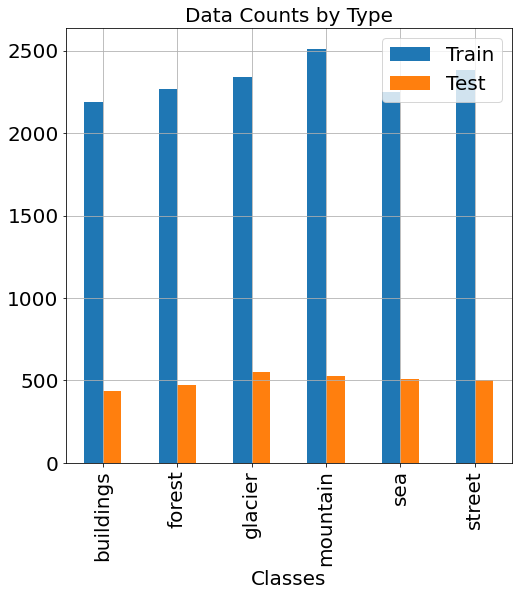

In [ ]:

# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
  
# creating dataframe
df = pd.DataFrame({
    'Classes': class_names,
    'Train': train_count,
    'Test': test_count
    
})
  
# plotting graph
df.plot(x="Classes", y=["Train", "Test"], kind="bar", figsize=(8,8), grid = True, title="Data Counts by Type")

##Visualize the Data

Selecting a sample of 25 images from training data. We will visualize some of the images that belong to each of the 6 categories, so that we have a more clear grasp on what kind of images are being fed to the program.  

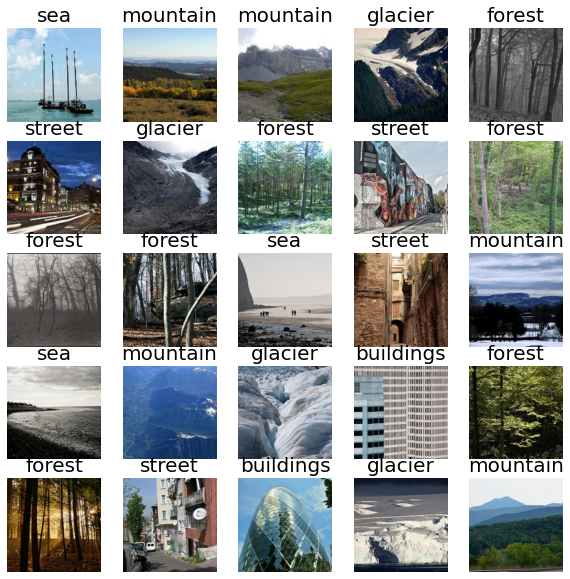

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in alex_train.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Resizing the data for pretrained model 
  
**NOTE:** In the original pipeline we resized the data for the pretrained models, but applying these following two code cells, cause input shape errors when training the model, which is why these parts have been left commented out.  

In [ ]:
#Commented out code because it caused input shape error
# Set the default input size for the pretrained model
#global input_size
#input_size = [224, 224]

In [ ]:
#Commented out code because it caused input shape error
# Resize the training data
#data_train = data_train.map(resize)

# Resize the validation data
#data_valid = data_valid.map(resize)

# Resize the test data
#data_test = data_test.map(resize)

## Preprocessing the data using pretrained model 
  
We are able to preprocess each of the respective training, validation, and test sets as follows, as well as shuffling the training data. But similar to what occured with the previous two cells, the process from the original pipeline of batching and prefetching the data has caused input shape errors when training the model, which is why that cell is also left out.  

In [ ]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [ ]:
# Preprocess the training data using pretrained model
alex_train = alex_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
alex_val = alex_val.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
alex_test = alex_test.map(preprocess_pretrain)

In [ ]:
# Shuffling the training data
alex_train = alex_train.shuffle(buffer_size=1000, seed=random_seed)

## Shuffling, batching and prefetching the data

In [ ]:
#Commented out code because it caused input shape error
# Shuffling the training data
#data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
#batch_size = 32

# Batch and prefetch the training data
#data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
#data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
#data_test = data_test.batch(batch_size).prefetch(1)

# Training

This section focuses on training our CNN using the training data and estimate the performance of the model using the validation data. When working on deep learning problems, it is best practice to implement a technique called transfer learning which applies knowledge accumulated from one task as a foundation for solving a second task. This significantly reduces the resources and time needed to develop a model for the second task. We take advantage of highly optimized Deep Neural Networks (DNNs) pretrained on similar data, and we make slight adjustments to the DNN to better suit our needs.

Regarding CNNs, transfer learning is extremely beneficial because lower layers of a pretrained will capture simple shapes and features which can be beneficial for any image dataset. 

## Creating the directory for the model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result4/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

There are many wonderful pretrained CNNs, and we decided to use the `AlexNet`. `AlexNet` was the winner of the 2012 ImageNet ILSVRC challenge, by obtaining one of the top five error rates with 17%. `AlexNet` was the first to have convolutional layers that were not followed by pooling layers, but with more convolution layers which can be observed in the following architecture, mainly after the 6th and 7th layers.
We will build the model architecture below, based on: [Implementing AlexNet CNN Architecture Using TensorFlow 2.0+ and Keras](https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98)  

In [ ]:
alexNet_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.4), #For avoiding overfitting
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.4),
    #keras.layers.Dense(1000, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation='softmax')
])
alexNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

## Setting Callbacks

We set our callbacks. This includes:   
- `ModelCheckpoint` which is used to save the best model.  
- `EarlyStopping` which provides regularization to prevent overfitting  
- `ReduceLROnPlateau` to reduce learning rate when a `val_loss` has stopped improving.

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result4/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

## Compiling the model
Here we use the learning rate schedule with a gradient descent optimizer.

In [ ]:
import time

root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# Compile the model
alexNet_model.compile(optimizer=keras.optimizers.SGD(lr = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
# Train, evaluate and save the best model
alexNet_history = alexNet_model.fit(alex_train,
                    epochs=5,
                    validation_data=alex_val,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])


Epoch 1/5
349/349 [==============================] - 43s 49ms/step - loss: 0.4039 - accuracy: 0.8525 - val_loss: 0.4978 - val_accuracy: 0.8275 - lr: 0.0010
Epoch 2/5
349/349 [==============================] - 43s 52ms/step - loss: 0.3811 - accuracy: 0.8592 - val_loss: 0.4497 - val_accuracy: 0.8461 - lr: 0.0010
Epoch 3/5
349/349 [==============================] - 43s 48ms/step - loss: 0.3513 - accuracy: 0.8731 - val_loss: 0.4698 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 4/5
349/349 [==============================] - 44s 55ms/step - loss: 0.2980 - accuracy: 0.8937 - val_loss: 0.4151 - val_accuracy: 0.8598 - lr: 1.0000e-04
Epoch 5/5
349/349 [==============================] - 45s 55ms/step - loss: 0.2840 - accuracy: 0.9011 - val_loss: 0.4107 - val_accuracy: 0.8555 - lr: 1.0000e-04


## Plotting the learning curve

### Creating the directory for the figure

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result4/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

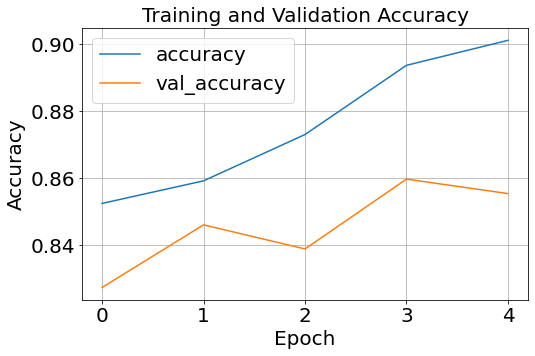

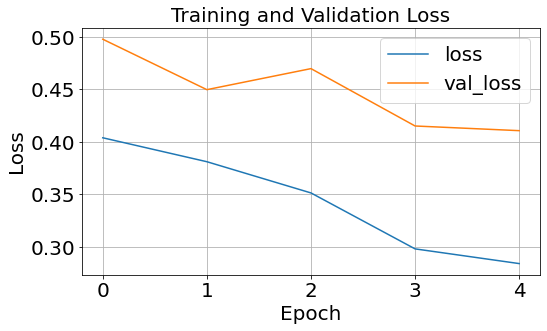

In [ ]:
# Create a figure
import pandas as pd

pd.DataFrame(alexNet_history.history)[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('Accuracy') 
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.savefig(abspath_curr + '/result4/figure/learning_curve_AlexNet_accuracy.pdf')

pd.DataFrame(alexNet_history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('Loss') 
plt.grid(True)
plt.title('Training and Validation Loss')


# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result4/figure/learning_curve_AlexNet_loss.pdf')
plt.show()

We are pleased with the initial results using the pretrained weights of `ResNet50`. Both the Accuracy and the Loss graphs show that we are not overfitting so we can move on to unfreezing our pretrained layers and retraining the weights to better suit our data.

  

# Testing 
  
Now that we have concluded training our model, we can now evaluate how good this model will work on the test data. 
  
First we will load the saved model as follows:    

##Loading the saved model

In [ ]:
# Load the saved model
alexNet_model.load_weights(filepath=abspath_curr + '/result4/model/model.h5')

##Evaluating the model
  
After having loaded our best saved model, we can now evaluate how well this will do on our test set.  

In [ ]:
loss, accuracy = alexNet_model.evaluate(alex_test)


94/94 [==============================] - 8s 79ms/step - loss: 0.4285 - accuracy: 0.8573


After having evaluated the model with our test data above, we can observe a pretty strong accuracy of (**about**) 0.9280.  

## Model Confusion Matrix 
  


In [ ]:
preds =  np.round(alexNet_model.predict(alex_test),0)
predictions = np.argmax(preds, axis=1)

In [ ]:
test_labels = np.concatenate([y for x, y in alex_test], axis=0)

In [ ]:
predictions[:100]

array([3, 4, 0, 2, 1, 1, 1, 5, 3, 4, 0, 1, 2, 5, 2, 0, 0, 5, 0, 5, 1, 4,
       1, 0, 2, 3, 3, 2, 0, 5, 1, 2, 5, 1, 4, 0, 0, 3, 4, 4, 1, 1, 1, 5,
       2, 4, 0, 0, 4, 0, 0, 0, 0, 3, 5, 5, 1, 3, 5, 0, 5, 4, 0, 5, 4, 5,
       0, 0, 0, 4, 5, 3, 2, 4, 5, 3, 1, 1, 0, 1, 3, 3, 5, 4, 2, 1, 2, 5,
       5, 3, 5, 3, 3, 2, 4, 5, 0, 1, 0, 5])

In [ ]:
test_labels[:100]

array([4, 3, 1, 1, 2, 2, 5, 5, 2, 5, 5, 3, 1, 4, 4, 2, 1, 3, 1, 3, 4, 5,
       4, 4, 0, 3, 0, 3, 2, 4, 0, 3, 0, 4, 4, 0, 5, 4, 0, 0, 5, 5, 5, 3,
       0, 2, 3, 5, 0, 3, 2, 3, 1, 3, 0, 0, 3, 2, 0, 2, 5, 2, 5, 0, 2, 3,
       3, 1, 0, 2, 0, 1, 2, 1, 5, 1, 0, 3, 2, 4, 2, 3, 5, 3, 3, 0, 3, 0,
       3, 4, 1, 0, 0, 4, 4, 2, 4, 0, 5, 5], dtype=int32)

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in alex_test:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = alexNet_model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
test_labels = tf.concat([item for item in y_true], axis = 0)
predictions = tf.concat([item for item in y_pred], axis = 0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

classification_metrics = metrics.classification_report(test_labels, predictions, target_names=names)

In [ ]:
print(classification_metrics)

              precision    recall  f1-score   support

   buildings       0.84      0.83      0.83       437
      forest       0.96      0.95      0.95       474
     glacier       0.82      0.81      0.81       553
    mountain       0.82      0.82      0.82       525
         sea       0.85      0.85      0.85       510
      street       0.87      0.89      0.88       501

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [ ]:
cm = confusion_matrix(test_labels, predictions)
cm

array([[361,   3,   5,  10,  16,  42],
       [  5, 449,   1,   3,   2,  14],
       [  8,   3, 449,  58,  27,   8],
       [  2,   5,  62, 431,  24,   1],
       [ 19,   3,  32,  18, 435,   3],
       [ 37,   7,   0,   4,   6, 447]])

In [ ]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools

Normalized confusion matrix


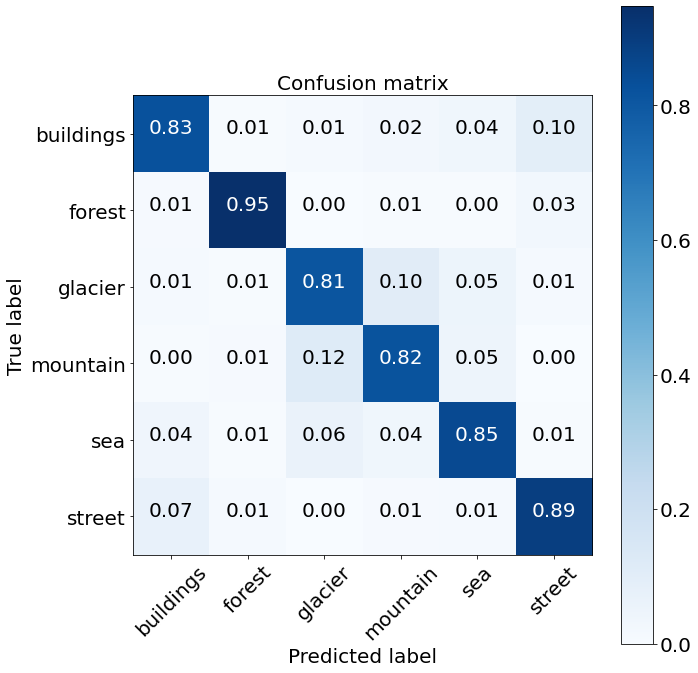

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cm, 
                      names,
                     normalize=True)

Above, we have the normalized confusion matrix where we can observe at first sight that the model did somewhat well at predicting each class. Most of the classes had over 80% of their images correctly classified into their respective classes. Though, we can see that the `forest` class had 95% of its observations correctly predicted.
  
An interesting observation is that the two classes that had the smallest amount of correct predictions, those being `glacier` with 81% and `mountain` with 82% seemed to have the majority of their incorrectly predicted images fall into the other class. For example, we can see that 10% of the images that were predicted to be of the `mountain` class, actually fall into the `glacier` class.  
Similarly, 12% of the images that were predicted to be of the `glacier` class fall into the `mountain` class.  
  
We can also observe something similar for the `buildings` and `street` classes, where around 10% of the images that were predicted to be of the `street` class, actually belonged to the `buildings` class, while 7% of the images predicted to be buildings, actually fall into the `street` class.  
  
A possibility for why this may be, is that both of these pairs of image classes could be quite similar to one another, even to the human eye. Usually streets and buildings go hand in hand, and this might have caused this to trouble the models predictions.  
Similarly for the glaciers and mountain, sometimes these may look quite similar to one another in the ways they are shaped or how the images were taken. 


## Evaluating the model

*   Loss = 0.2207
*   Accuracy = 0.9280


In [ ]:
loss, accuracy = alexNet_model.evaluate(alex_test)

# Reference
- The material used for the introductory information, as well as the code for building, compiling and training CNNs were largely inspired by the following work:
    - Géron, A., 2019. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media.

- The deep utitilities and pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s3 convolutional_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2021/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb)
    - Huang, Yuxiao, 2021. "Machine Learning I". Fall 2021.

- AlexNet Architecture based on the following example: [Implementing AlexNet CNN Architecture Using TensorFlow 2.0+ and Keras](https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98) 

- [Tensorflow load and preprocess images](https://tensorflow.google.cn/tutorials/load_data/images?hl=en)

